In [278]:
import numpy as np 
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [279]:
def generate_data():
    np.random.seed(0)
    X = np.random.uniform(-10, 10, (2000, 2))
    y = (X[:, 1] > 1 - X[:, 0]).astype(int)
    return X, y

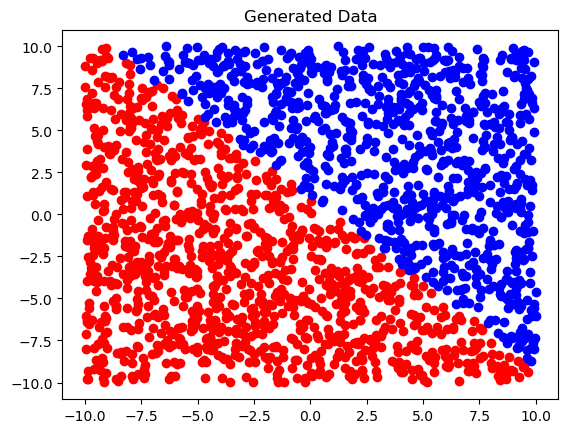

In [280]:
X, y = generate_data()
plt.plot(X[y==0, 0], X[y==0, 1], 'ro')
plt.plot(X[y==1, 0], X[y==1, 1], 'bo')
plt.title('Generated Data')
plt.show()

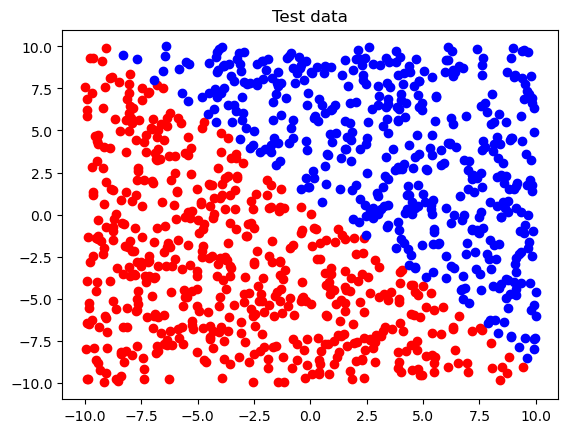

In [281]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=6)
plt.plot(X_test[y_test==0][:,0], X_test[y_test==0][:,1], 'ro')
plt.plot(X_test[y_test==1][:,0], X_test[y_test==1][:,1], 'bo')
plt.title('Test data')
plt.show()

## Linear SVM

In [282]:
model = LinearSVC()
model.fit(X_train, y_train)

LinearSVC()

In [283]:
def plot_decision_boundery(model, X, y):
    pred = model.predict(X)
    plt.plot(X[y!=pred][:,0], X[y!=pred][:,1], 'ro')
    plt.plot(X[y==pred][:,0], X[y==pred][:,1], 'bo')
    plt.title('decision boundery')
    w = model.coef_[0]
    b = model.intercept_[0]
    x0 = np.linspace(-10, 10, 100)
    x1 = -w[0]/w[1]*x0 - b/w[1]
    plt.plot(x0, x1, 'g-')
    plt.show()

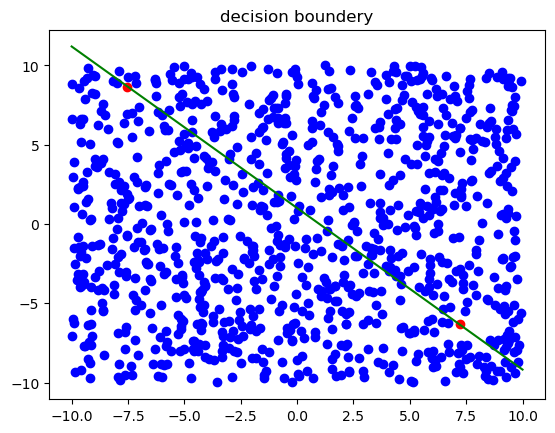

In [284]:
plot_decision_boundery(model, X_train, y_train)

In [285]:
pred = model.predict(X_train)
X_train[pred != y_train].size

4

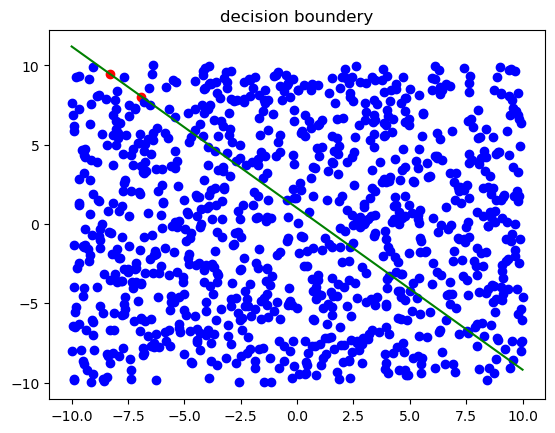

In [286]:
plot_decision_boundery(model, X_test, y_test)

In [287]:
pred = model.predict(X_test)
X_test[pred != y_test].size

4

## Polynomial Kernel

In [288]:
def plot_kernel_decision_boundery(X, y, model):
    pred = model.predict(X)
    plt.plot(X[y!=pred][:,0], X[y!=pred][:,1], 'ro')
    plt.plot(X[y==pred][:,0], X[y==pred][:,1], 'bo')
    plt.title('decision boundery')
    x0 = np.linspace(-10, 10, 100)
    x1 = np.linspace(-10, 10, 100)
    X0, X1 = np.meshgrid(x0, x1)
    Z = model.decision_function(np.c_[X0.ravel(), X1.ravel()])
    Z = Z.reshape(X0.shape)
    plt.contour(X0, X1, Z, levels=[0], colors='g')
    plt.show()

In [289]:
model = SVC(kernel='poly', degree=3)
model.fit(X_train, y_train)

SVC(kernel='poly')

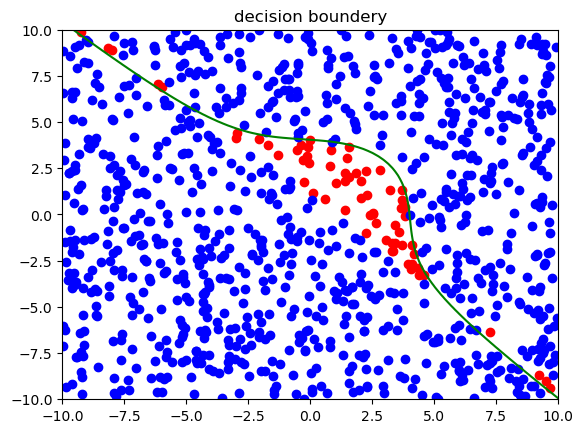

In [290]:
plot_kernel_decision_boundery(X_train, y_train, model)

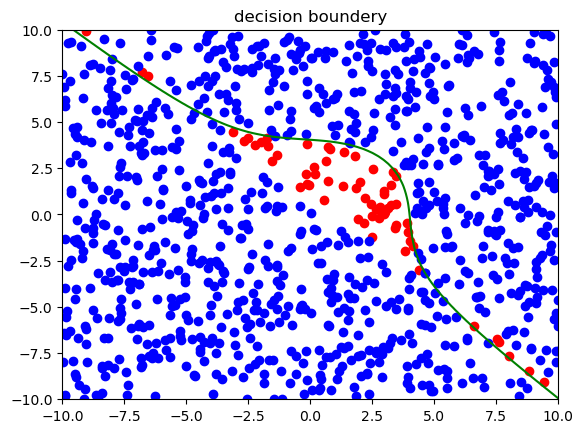

In [291]:
plot_kernel_decision_boundery(X_test, y_test, model)

In [292]:
model = SVC(kernel='poly', degree=2)
model.fit(X_train, y_train)

SVC(degree=2, kernel='poly')

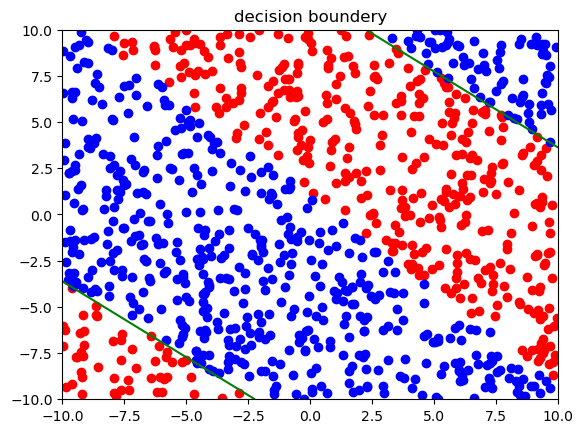

In [293]:
plot_kernel_decision_boundery(X_train, y_train, model)

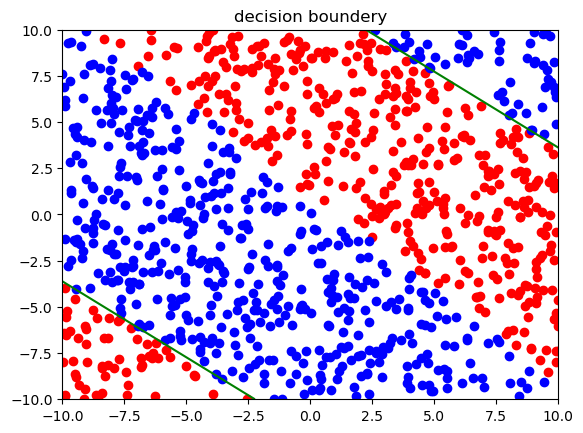

In [294]:
plot_kernel_decision_boundery(X_test, y_test, model)

## RBF Kernel

In [295]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

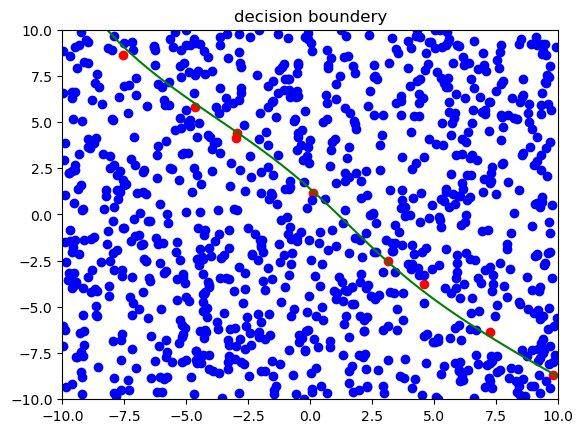

In [296]:
plot_kernel_decision_boundery(X_train, y_train, model)

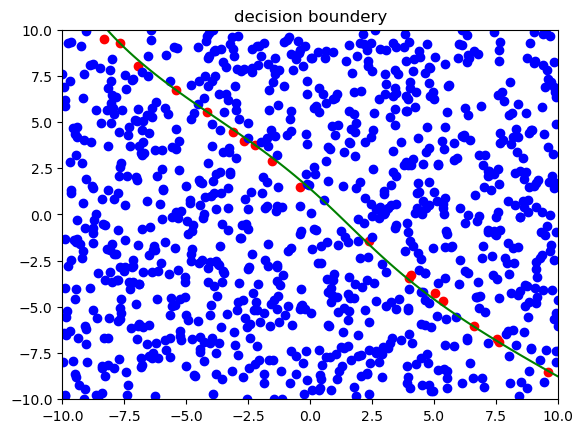

In [297]:
plot_kernel_decision_boundery(X_test, y_test, model)

In [298]:
print('Train Score:', model.score(X_train, y_train))
print('Test Score:', model.score(X_test, y_test))

Train Score: 0.991
Test Score: 0.981


## Higher Dimensions

In [323]:
def generate_higher_dimensional_data():
    np.random.seed(0)
    X = np.random.uniform(-10, 10, (2000, 10))
    y = (X[:, 1] > 1 - X[:, 0]).astype(int)
    return X, y

In [324]:
X, y = generate_higher_dimensional_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=6)

In [325]:
import time

model = SVC(kernel='rbf')
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
print(f"Model fitting took {end_time - start_time} seconds")

Model fitting took 0.00785374641418457 seconds


In [326]:
start_time = time.time()
model.score(X_train, y_train)
end_time = time.time()
print(f"Model scoring took {end_time - start_time} seconds")

Model scoring took 0.014571905136108398 seconds


In [327]:
start_time = time.time()
model.predict(X_test)
end_time = time.time()
print(f"Model prediction took {end_time - start_time} seconds")

Model prediction took 0.016652822494506836 seconds


In [328]:
model.score(X_train, y_train)

0.991

In [329]:
model.score(X_test, y_test)

0.941

## Curse of Dimensionality

In [353]:
np.random.seed(0)
def generate_data(N, p):
    X = np.random.uniform(-10, 10, (N, p))
    y = (X[:, 1] > 1 - X[:, 0]).astype(int)
    return X, y

In [354]:
X, y = generate_data(200, 2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=6)

In [355]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [356]:
print('Train Score:', model.score(X_train, y_train))
print('Test Score:', model.score(X_test, y_test))

Train Score: 1.0
Test Score: 0.9


In [357]:
X, y = generate_data(200, 200)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=6)

In [358]:
model.fit(X_train, y_train)

SVC()

In [359]:
print('Train Score:', model.score(X_train, y_train))
print('Test Score:', model.score(X_test, y_test))

Train Score: 1.0
Test Score: 0.5


In [360]:
X, y = generate_data(200, 2000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=6)

In [361]:
model.fit(X_train, y_train)

SVC()

In [362]:
print('Train Score:', model.score(X_train, y_train))
print('Test Score:', model.score(X_test, y_test))

Train Score: 1.0
Test Score: 0.54


In [363]:
dimensions = [2, 20, 200, 500, 1000, 1500, 2000]
train_scores = []
test_scores = []
model = SVC(kernel='rbf')
for p in dimensions:
    X, y = generate_data(200, p)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=6)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

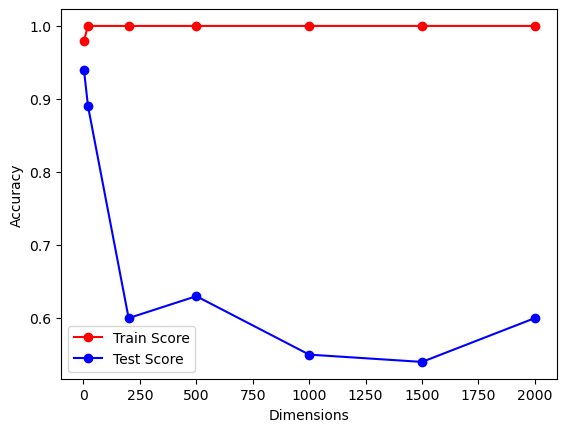

In [364]:
plt.plot(dimensions, train_scores, 'ro-', label='Train Score')
plt.plot(dimensions, test_scores, 'bo-', label='Test Score')
plt.xlabel('Dimensions')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Circle Hypothesis

In [374]:
def generate_data():
    np.random.seed(0)
    X = np.random.rand(2000, 2)
    y = ((X[:, 0] - 0.5)**2 + (X[:, 1] - 0.5)**2 < 0.25**2).astype(int)
    return X, y

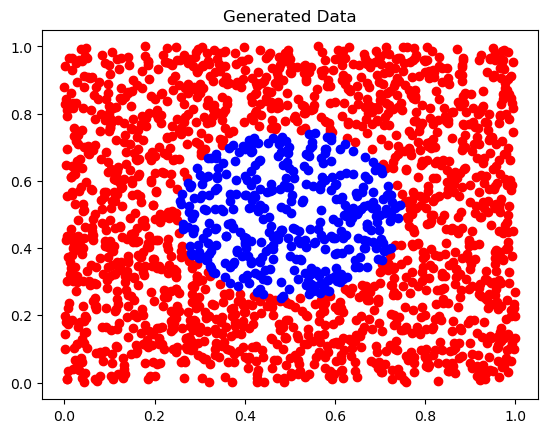

In [399]:
X, y = generate_data()
plt.plot(X[y==0, 0], X[y==0, 1], 'ro')
plt.plot(X[y==1, 0], X[y==1, 1], 'bo')
plt.title('Generated Data')
plt.show()

In [400]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=6)

## Polynomial Kernel

In [421]:
model = SVC(kernel='poly', degree=2)
model.fit(X_train, y_train)

SVC(degree=2, kernel='poly')

In [422]:
print('Train Score:', model.score(X_train, y_train))
print('Test Score:', model.score(X_test, y_test))

Train Score: 0.82
Test Score: 0.807


In [427]:
model = SVC(kernel='poly', degree=3)
model.fit(X_train, y_train)

SVC(kernel='poly')

In [428]:
print('Train Score:', model.score(X_train, y_train))
print('Test Score:', model.score(X_test, y_test))

Train Score: 0.82
Test Score: 0.807


In [429]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [430]:
print('Train Score:', model.score(X_train, y_train))
print('Test Score:', model.score(X_test, y_test))

Train Score: 0.994
Test Score: 0.988
